In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel (r'C:\Users\COMP\Desktop\CUSTOMER CHURN.xlsx')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

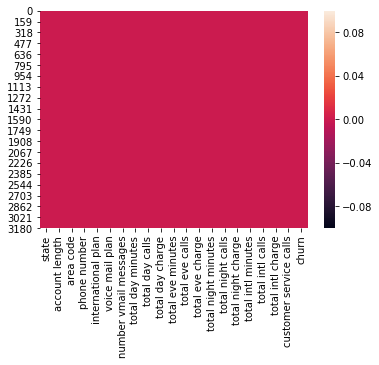

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

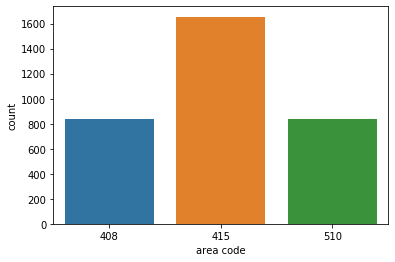

In [10]:
sns.countplot(df['area code'])

Text(0.5, 1.0, 'international plan vs total intl charge')

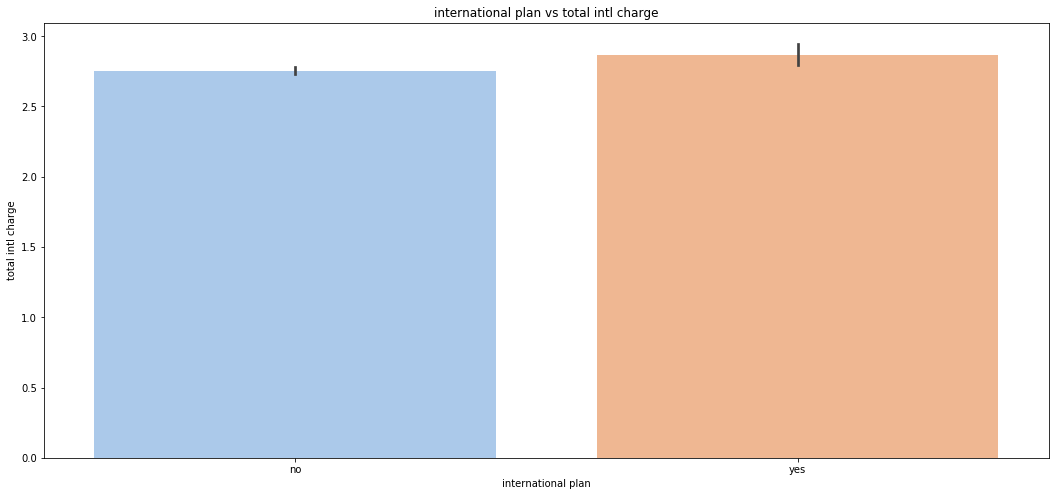

In [11]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'international plan', y = 'total intl charge', data = df, palette ='pastel')

plt.title('international plan vs total intl charge')

Text(0.5, 1.0, 'churn vs customer service calls')

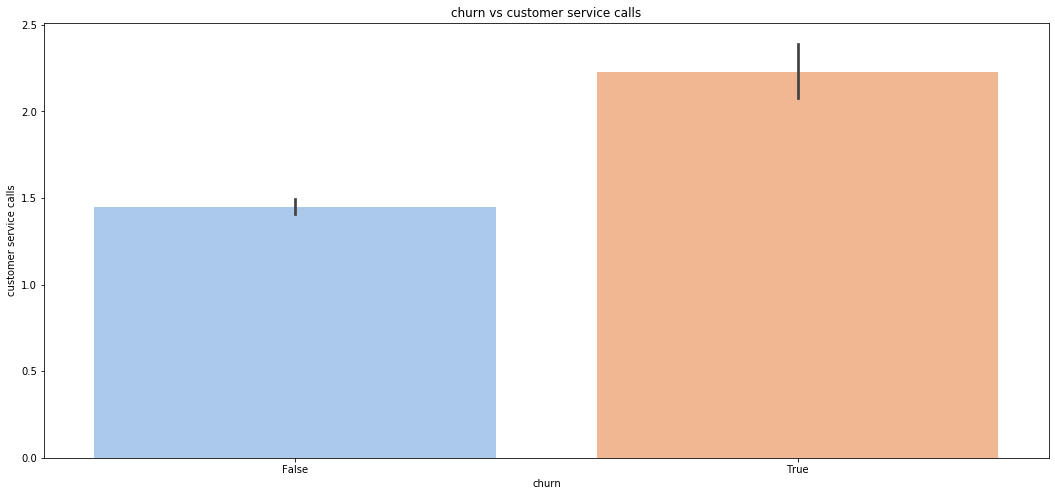

In [12]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'churn', y = 'customer service calls', data = df, palette ='pastel')

plt.title('churn vs customer service calls')

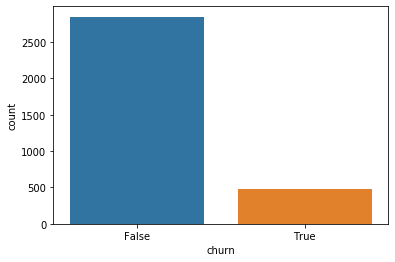

In [13]:
sns.countplot(df['churn'])

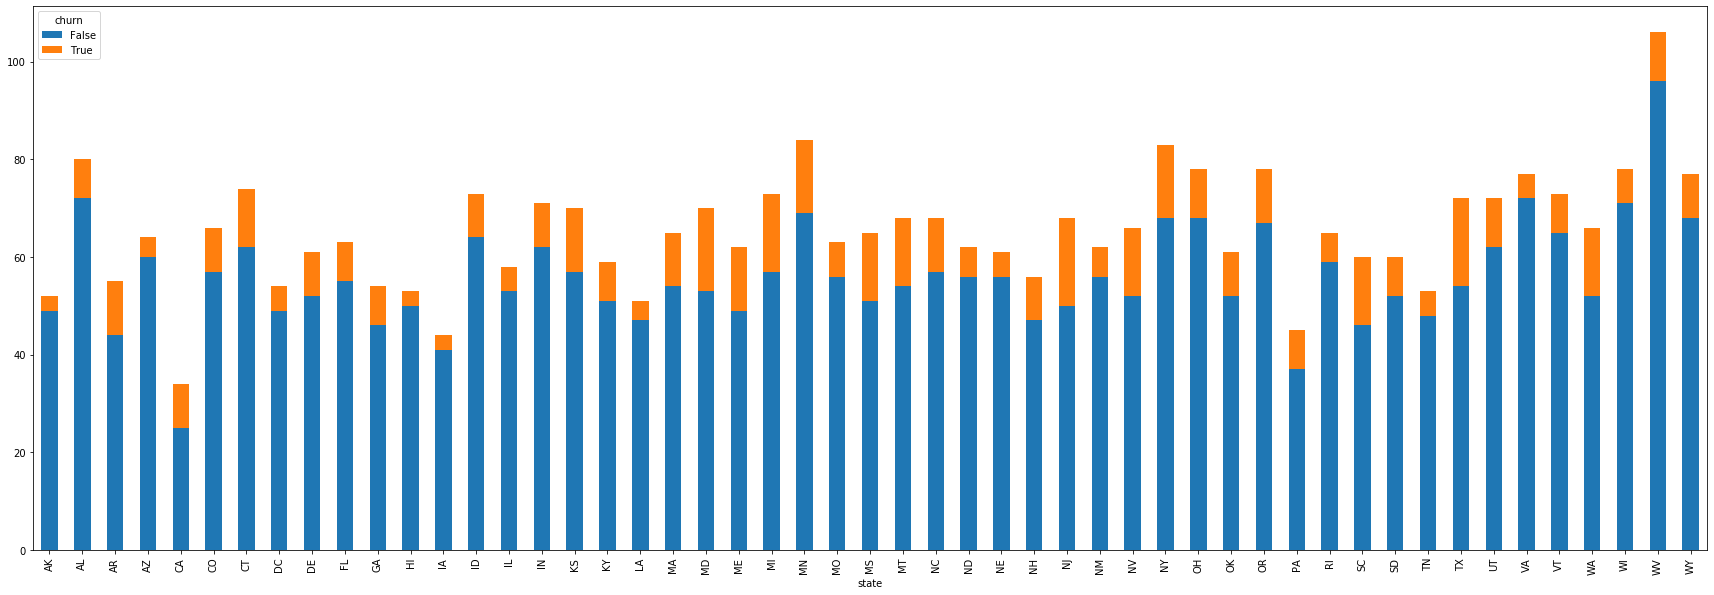

In [14]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 
#which states moving from a specific service or a service provider to another in a given period of time mi state has lot of churn

In [15]:
pd.crosstab(df['state'],df["number vmail messages"])

number vmail messages,0,4,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
state,,,,,,,,,,,,,,,,,,,,,
AK,36,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AL,59,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AR,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AZ,45,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
CA,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,53,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
DC,36,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


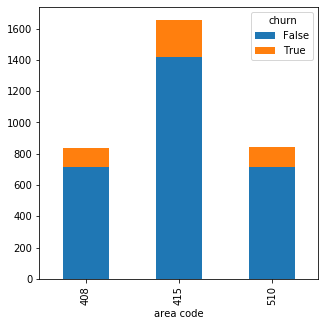

In [16]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
# in 415 state code moving from a specific service or a service provider to another in a given period of time

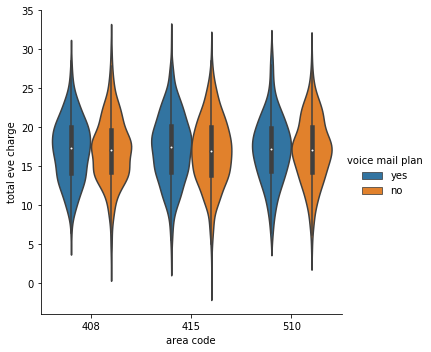

In [17]:
g=sns.catplot(x="area code",y="total eve charge",hue="voice mail plan",data=df,kind="violin")
plt.show()

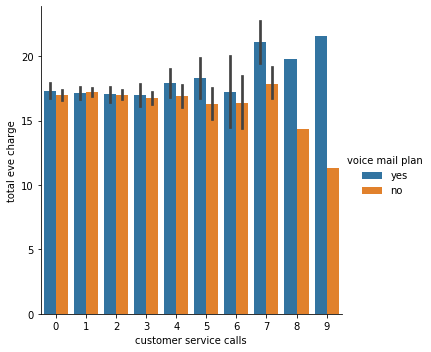

In [18]:
g=sns.catplot(x="customer service calls",y="total eve charge",hue="voice mail plan",data=df,kind="bar")
plt.show()
#7 call nd 9 calls have highest total eve charges 

{'bodies': [<matplotlib.collections.PolyCollection at 0x291a7fdf8c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x291a8048a48>,
 'cmins': <matplotlib.collections.LineCollection at 0x291a7fd4908>,
 'cbars': <matplotlib.collections.LineCollection at 0x291a7fd4e48>}

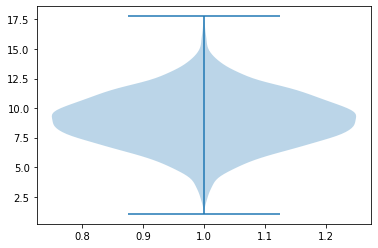

In [19]:
plt.violinplot(df['total night charge'])
#7.5 to 10 most frequent night charge

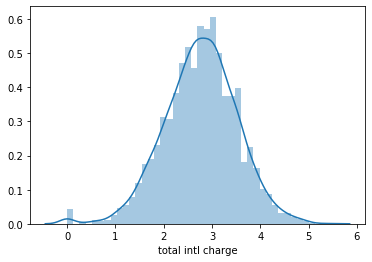

In [20]:
sns.distplot(df['total intl charge'])
# 1 to 5 most frequent total intl charges

In [21]:
df.corr()
#number of vmail messages has inverse relationship with customer churn ,customer service being strongly correlated with churn

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


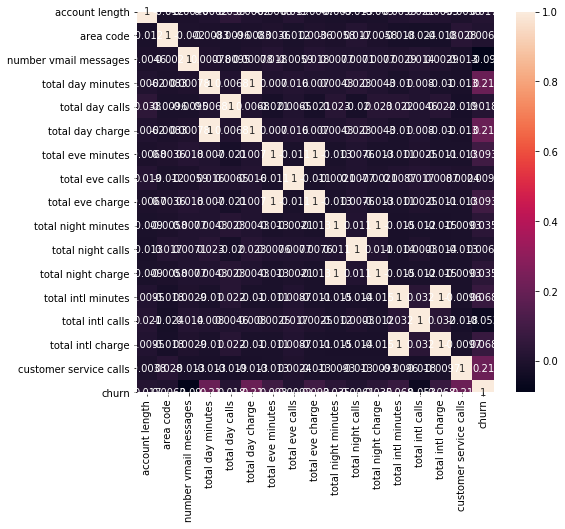

In [22]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [23]:
# label conding these variables international plan, churn ,voice mail plan,state
from sklearn.preprocessing import LabelEncoder

df['international plan']=df['international plan'].map({'no':0,
                                    'yes':1})
df['voice mail plan']=df['voice mail plan'].map({'no':0,
                                    'yes':1})


lb=LabelEncoder()
df['state'] = lb.fit_transform(df['state'])


In [24]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
df.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


In [26]:
x = df.drop(['churn','phone number'], axis = 1)

y = df['churn'].as_matrix().astype(np.int)
y.size

3333

In [27]:
lm = LogisticRegression()

In [28]:
df = df.sample(frac=1, random_state=0)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [30]:
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [32]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[916  21]
 [141  22]]
0.8527272727272728


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [35]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[923  14]
 [ 55 108]]
0.9372727272727273


In [36]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
predsvc=svc.predict(x_test)
print('actual and predicted churn status',accuracy_score(y_test,predsvc))

actual and predicted churn status 0.8518181818181818


In [38]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[937   0]
 [163   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       937
           1       0.00      0.00      0.00       163

    accuracy                           0.85      1100
   macro avg       0.43      0.50      0.46      1100
weighted avg       0.73      0.85      0.78      1100



In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [41]:
predknn

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       937
           1       0.67      0.21      0.33       163

    accuracy                           0.87      1100
   macro avg       0.78      0.60      0.63      1100
weighted avg       0.85      0.87      0.84      1100



In [43]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.86


In [45]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8627272727272727
[[890  47]
 [104  59]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       937
           1       0.56      0.36      0.44       163

    accuracy                           0.86      1100
   macro avg       0.73      0.66      0.68      1100
weighted avg       0.85      0.86      0.85      1100



In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)

print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Test Accuracy:  0.8827272727272727


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [49]:
import time

lm = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lm, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.861386 using {'dual': False, 'max_iter': 100}
Execution time: 5.517100811004639 ms


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.858
Accuracy score (validation): 0.853

Learning rate:  0.1
Accuracy score (training): 0.877
Accuracy score (validation): 0.861

Learning rate:  0.25
Accuracy score (training): 0.898
Accuracy score (validation): 0.874

Learning rate:  0.5
Accuracy score (training): 0.929
Accuracy score (validation): 0.894

Learning rate:  0.75
Accuracy score (training): 0.921
Accuracy score (validation): 0.891

Learning rate:  1
Accuracy score (training): 0.921
Accuracy score (validation): 0.867



In [52]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [53]:
svmkernel('rbf')

Mean Scores 0.8550859705282494
Standard deviation 0.0006286087376971031
[[2850    0]
 [ 483    0]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='accuracy').mean())



Train F1 Score  0.7970204841713222
Train Accuracy  0.9511867442901926
Validation Mean F1 Score:  0.7516418797788799
Validation Mean Accuracy:  0.913120855529138


In [ ]:
#random forest classifier works best giving accuracy of 91 

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [58]:
y_pred_prob=lm.predict_proba(x_test)[:,1]

In [59]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [60]:
fpr

array([0.        , 0.        , 0.        , 0.00213447, 0.00213447,
       0.00320171, 0.00320171, 0.00426894, 0.00426894, 0.00747065,
       0.00747065, 0.01173959, 0.01173959, 0.01280683, 0.01280683,
       0.01387407, 0.01387407, 0.01707577, 0.01707577, 0.01921025,
       0.01921025, 0.02027748, 0.02027748, 0.02134472, 0.02134472,
       0.02561366, 0.02561366, 0.02881537, 0.02881537, 0.0298826 ,
       0.0298826 , 0.03094984, 0.03094984, 0.03201708, 0.03201708,
       0.03308431, 0.03308431, 0.03521878, 0.03521878, 0.03735326,
       0.03735326, 0.03842049, 0.03842049, 0.04055496, 0.04055496,
       0.0416222 , 0.0416222 , 0.04482391, 0.04482391, 0.04802561,
       0.04802561, 0.05122732, 0.05122732, 0.05442903, 0.05442903,
       0.05549626, 0.05549626, 0.05763074, 0.05763074, 0.05976521,
       0.05976521, 0.06510139, 0.06510139, 0.06616862, 0.06616862,
       0.06830309, 0.06830309, 0.07470651, 0.07470651, 0.07790822,
       0.07790822, 0.08110993, 0.08110993, 0.08431163, 0.08431

In [61]:
tpr

array([0.        , 0.00613497, 0.03067485, 0.03067485, 0.04907975,
       0.04907975, 0.05521472, 0.05521472, 0.06748466, 0.06748466,
       0.07361963, 0.07361963, 0.09202454, 0.09202454, 0.09815951,
       0.09815951, 0.10429448, 0.10429448, 0.11042945, 0.11042945,
       0.12269939, 0.12269939, 0.12883436, 0.12883436, 0.13496933,
       0.13496933, 0.14110429, 0.14110429, 0.14723926, 0.14723926,
       0.17791411, 0.17791411, 0.2208589 , 0.2208589 , 0.23312883,
       0.23312883, 0.2392638 , 0.2392638 , 0.24539877, 0.24539877,
       0.25153374, 0.25153374, 0.26380368, 0.26380368, 0.28220859,
       0.28220859, 0.29447853, 0.29447853, 0.30674847, 0.30674847,
       0.32515337, 0.32515337, 0.34969325, 0.34969325, 0.36196319,
       0.36196319, 0.36809816, 0.36809816, 0.37423313, 0.37423313,
       0.3803681 , 0.3803681 , 0.38650307, 0.38650307, 0.39263804,
       0.39263804, 0.40490798, 0.40490798, 0.41104294, 0.41104294,
       0.42331288, 0.42331288, 0.42944785, 0.42944785, 0.43558

In [62]:
thresholds

array([1.95200429, 0.95200429, 0.76631629, 0.74052203, 0.69947593,
       0.68797872, 0.67740769, 0.65819789, 0.63405947, 0.62429253,
       0.61916961, 0.58633456, 0.57223447, 0.56593522, 0.55990213,
       0.55979243, 0.55533873, 0.53365639, 0.53202614, 0.52915595,
       0.52402117, 0.52364553, 0.51695907, 0.5120909 , 0.50559078,
       0.49414644, 0.49368309, 0.48866892, 0.48694365, 0.48225853,
       0.46176381, 0.46110681, 0.43374222, 0.43183071, 0.4269278 ,
       0.42323889, 0.42215448, 0.41900542, 0.41603046, 0.41169649,
       0.40911959, 0.4078689 , 0.4007858 , 0.39988205, 0.39505309,
       0.39476213, 0.3917741 , 0.38150426, 0.37481297, 0.37124406,
       0.35966085, 0.3572044 , 0.34895058, 0.34010527, 0.33436168,
       0.33279574, 0.325888  , 0.32121598, 0.32024032, 0.31461245,
       0.31148067, 0.30783731, 0.30704333, 0.30607358, 0.30569964,
       0.30493709, 0.30138445, 0.29133743, 0.29010544, 0.28307924,
       0.27951045, 0.27412547, 0.27349639, 0.27136472, 0.27030

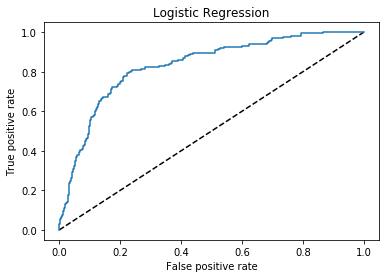

In [63]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [64]:
auc_score=roc_auc_score(y_test,lm.predict(x_test))

In [65]:
auc_score

0.556278686055876

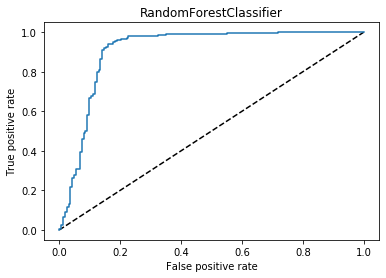

In [67]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [69]:
auc_score

0.8238176925444082

In [70]:
#random forest classifier works best WITH 91 ACCURACY ND AUC SCORE AS 82
from sklearn.externals import joblib
joblib.dump(rf,'rfchurn.obj')
rf_from_joblib=joblib.load('rfchurn.obj')